In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [3]:
df=pd.read_csv("C:\\Users\\BIMAN\\OneDrive\\Desktop\\Volt_Veda\\dataset\\battery_dataset_update.csv")
df.head()

,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index,battery_health_percent
0,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04,50.00
1,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23,61.50
2,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21,76.72
3,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13,59.97
4,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95,67.91


In [4]:
X=df.drop("battery_health_percent", axis=1)
y=df["battery_health_percent"]

In [5]:
numeric_features=X.select_dtypes(include=["int64", "float64"]).columns 
Categorical_features=X.select_dtypes(include=["object"]).columns 

print("Numeric columns:", list(numeric_features))
print("Categorical Columns:", list(Categorical_features))

Numeric columns: ['device_age_months', 'battery_capacity_mah', 'avg_screen_on_hours_per_day', 'avg_charging_cycles_per_week', 'avg_battery_temp_celsius', 'fast_charging_usage_percent', 'overnight_charging_freq_per_week', 'gaming_hours_per_week', 'video_streaming_hours_per_week', 'charging_habit_score', 'usage_intensity_score', 'thermal_stress_index']
Categorical Columns: ['background_app_usage_level', 'signal_strength_avg']


In [6]:
skew_values=df[numeric_features].skew().sort_values(ascending=False)
print(skew_values)

gaming_hours_per_week                1.396580
avg_charging_cycles_per_week         0.246096
thermal_stress_index                 0.188746
video_streaming_hours_per_week       0.131313
avg_screen_on_hours_per_day          0.066587
overnight_charging_freq_per_week     0.017613
avg_battery_temp_celsius            -0.013870
charging_habit_score                -0.016357
device_age_months                   -0.020109
fast_charging_usage_percent         -0.031981
battery_capacity_mah                -0.440178
usage_intensity_score              -48.514780
dtype: float64


In [7]:
!pip install seaborn

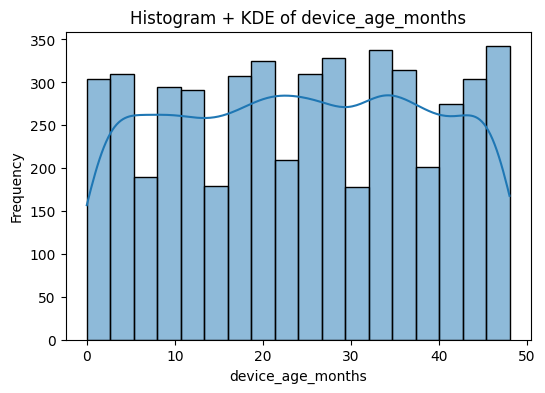

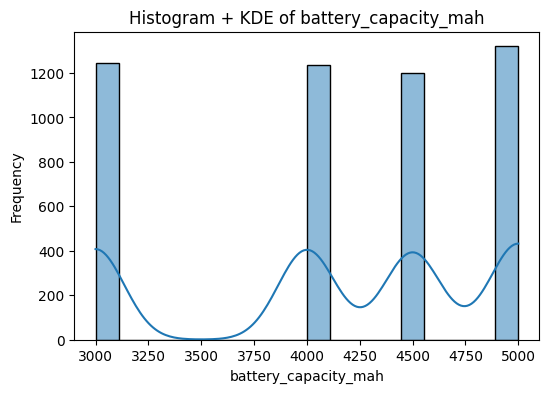

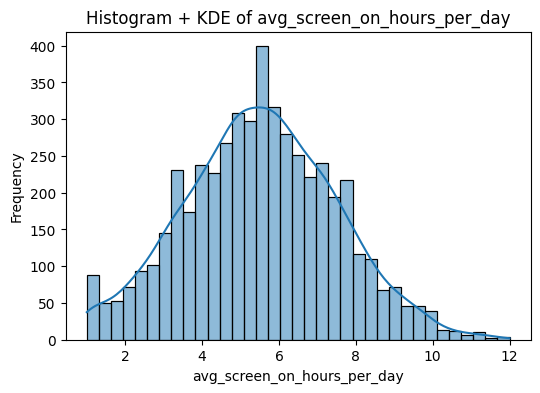

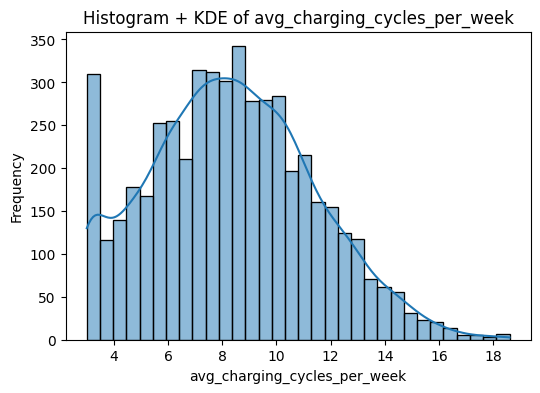

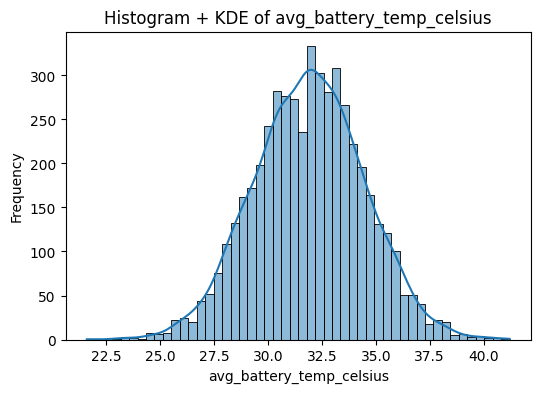

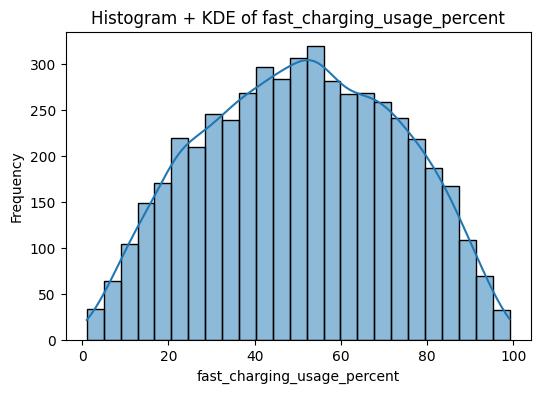

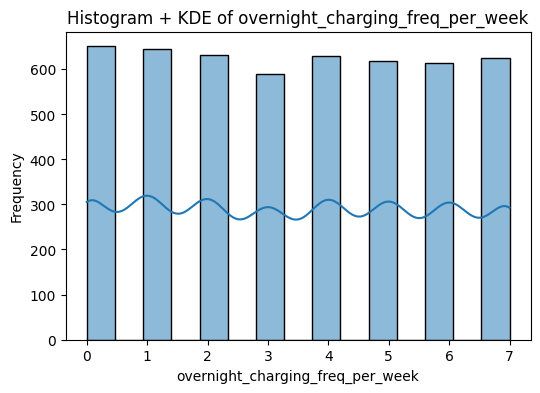

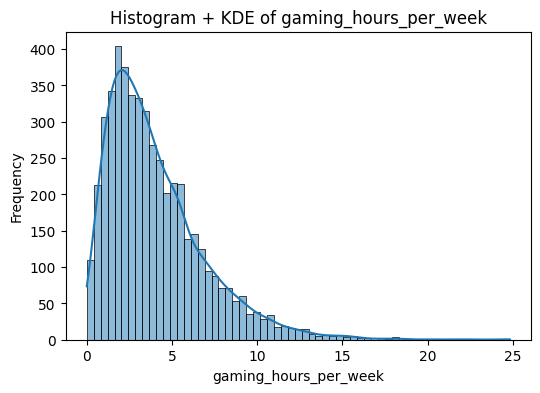

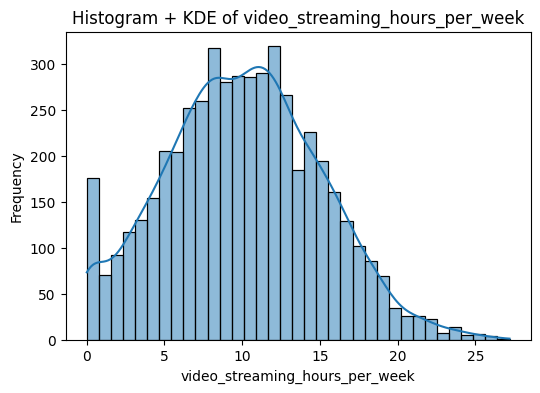

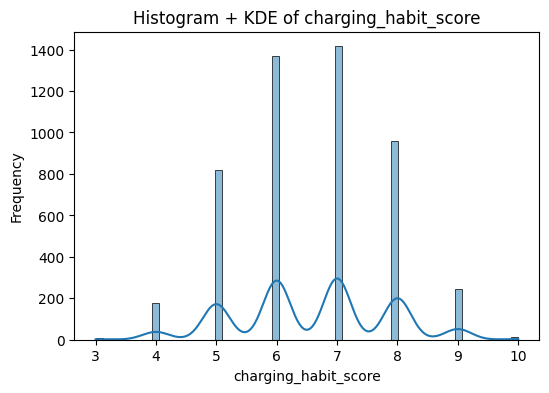

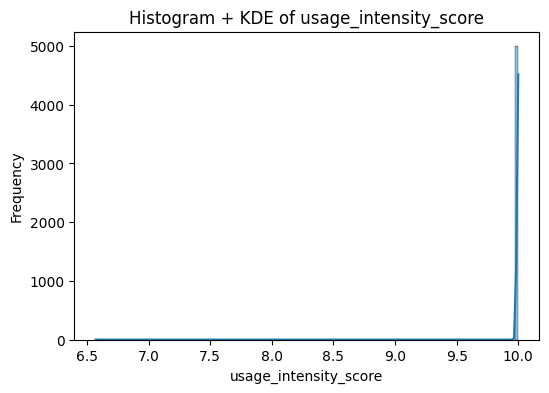

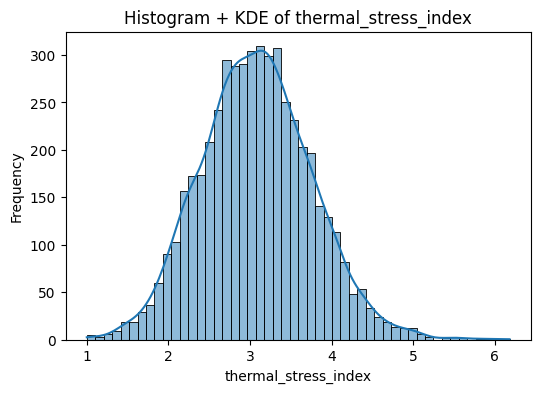

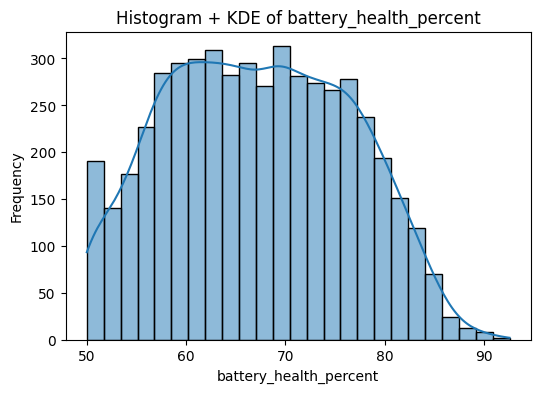

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram + KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [9]:
## Numeric Transformer
from sklearn.preprocessing import PowerTransformer


numeric_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Power", PowerTransformer(method='yeo-johnson')),
    ("scaler", StandardScaler())
])

## Categorical Transformer 

Categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("Onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [10]:
preprocessor=ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("Cat", Categorical_transformer, Categorical_features)
])

In [11]:
model=Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
model.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('Cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [18]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred)) 
r2=r2_score(y_test,y_pred) 

print("MAE:", mae) 
print("RMSE:", rmse) 
print("r2_score:", r2)

MAE: 1.6084597371976947
RMSE: 1.8929116996861013
r2_score: 0.957711339653563


In [ ]:
import joblib 
joblib.dump(model,"Battery_health_pipeline.pkl")

['Battery_heralth_pipeline.pkl']